In [155]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [120]:

url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"



In [121]:
titanic= pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [123]:
titanic['Age'].isna().sum()

177

C:\Users\Pankaj\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Pankaj\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


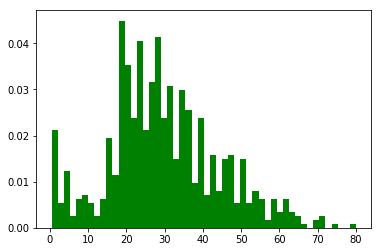

In [124]:
n, bins, patches = plt.hist(titanic['Age'], 50,
                            density=True, facecolor='g', alpha=1)


In [125]:
titanic['Age'].mean()

29.69911764705882

In [126]:
titanic['Age']=titanic['Age'].fillna(30)

In [127]:
titanic['Age'].isna().sum()

0

In [128]:
titanic['Age'].mean()

29.758888888888887

In [139]:
titanic['Sex']=titanic['Sex'].map({'female':0,'male':1}).astype(int)

In [140]:
X=titanic.drop(columns=['PassengerId','Survived','Name','Ticket','Cabin','Embarked'])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null int32
Age       891 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


In [142]:
y=titanic['Survived']

In [143]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size= 0.30,random_state=355)

In [144]:
x_train.count()

Pclass    623
Sex       623
Age       623
SibSp     623
Parch     623
Fare      623
dtype: int64

In [145]:
x_test.count()

Pclass    268
Sex       268
Age       268
SibSp     268
Parch     268
Fare      268
dtype: int64

In [169]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [170]:
clf.score(x_train,y_train)

0.9839486356340289

In [171]:
y_pred=clf.predict(x_test)

In [172]:
clf.score(x_test,y_test)

0.7425373134328358

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       171
           1       0.63      0.68      0.66        97

   micro avg       0.74      0.74      0.74       268
   macro avg       0.72      0.73      0.73       268
weighted avg       0.75      0.74      0.74       268



In [174]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [175]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [184]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 32), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10), 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [177]:
best_param=grid_search.best_params_
print(best_param)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'random'}


In [178]:
clf1=DecisionTreeClassifier(criterion= 'entropy', max_depth= 25, min_samples_leaf= 3, min_samples_split= 9, splitter= 'random')


In [179]:
clf1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [180]:
clf1.score(x_train,y_train)

0.841091492776886

In [181]:
y_pred1=clf1.predict(x_test)

In [183]:
clf1.score(x_test,y_test)

0.7985074626865671

In [185]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       171
           1       0.75      0.67      0.71        97

   micro avg       0.80      0.80      0.80       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268



In [186]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       171
           1       0.63      0.68      0.66        97

   micro avg       0.74      0.74      0.74       268
   macro avg       0.72      0.73      0.73       268
weighted avg       0.75      0.74      0.74       268

